Importing the Dataset

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()
from matplotlib import pyplot as plt, font_manager as fm

In [4]:
milkData = pd.read_csv('/content/archive (1).zip')

Data Preparation and Cleaning

In [5]:
milkData.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
milkData.shape

(1059, 8)

In [7]:
milkData.dtypes


,0
pH,float64
Temprature,int64
Taste,int64
Odor,int64
Fat,int64
Turbidity,int64
Colour,int64
Grade,object


In [8]:
milkData.dropna()
milkData.shape

(1059, 8)

Checking for duplicates

In [9]:
milkData.duplicated().sum()

976

In [10]:
milkData.loc[milkData.duplicated(),:]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [11]:
milkData.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [12]:
milkData.nunique()

,0
pH,16
Temprature,17
Taste,2
Odor,2
Fat,2
Turbidity,2
Colour,9
Grade,3


In [13]:
milkData.info

<bound method DataFrame.info of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]>

Exploratory Data Analysis

In [14]:
milkData1= pd.DataFrame(milkData)

# Remove column name 'A'
milkData2=milkData.drop(['Grade'], axis=1)

In [15]:
milkData2

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


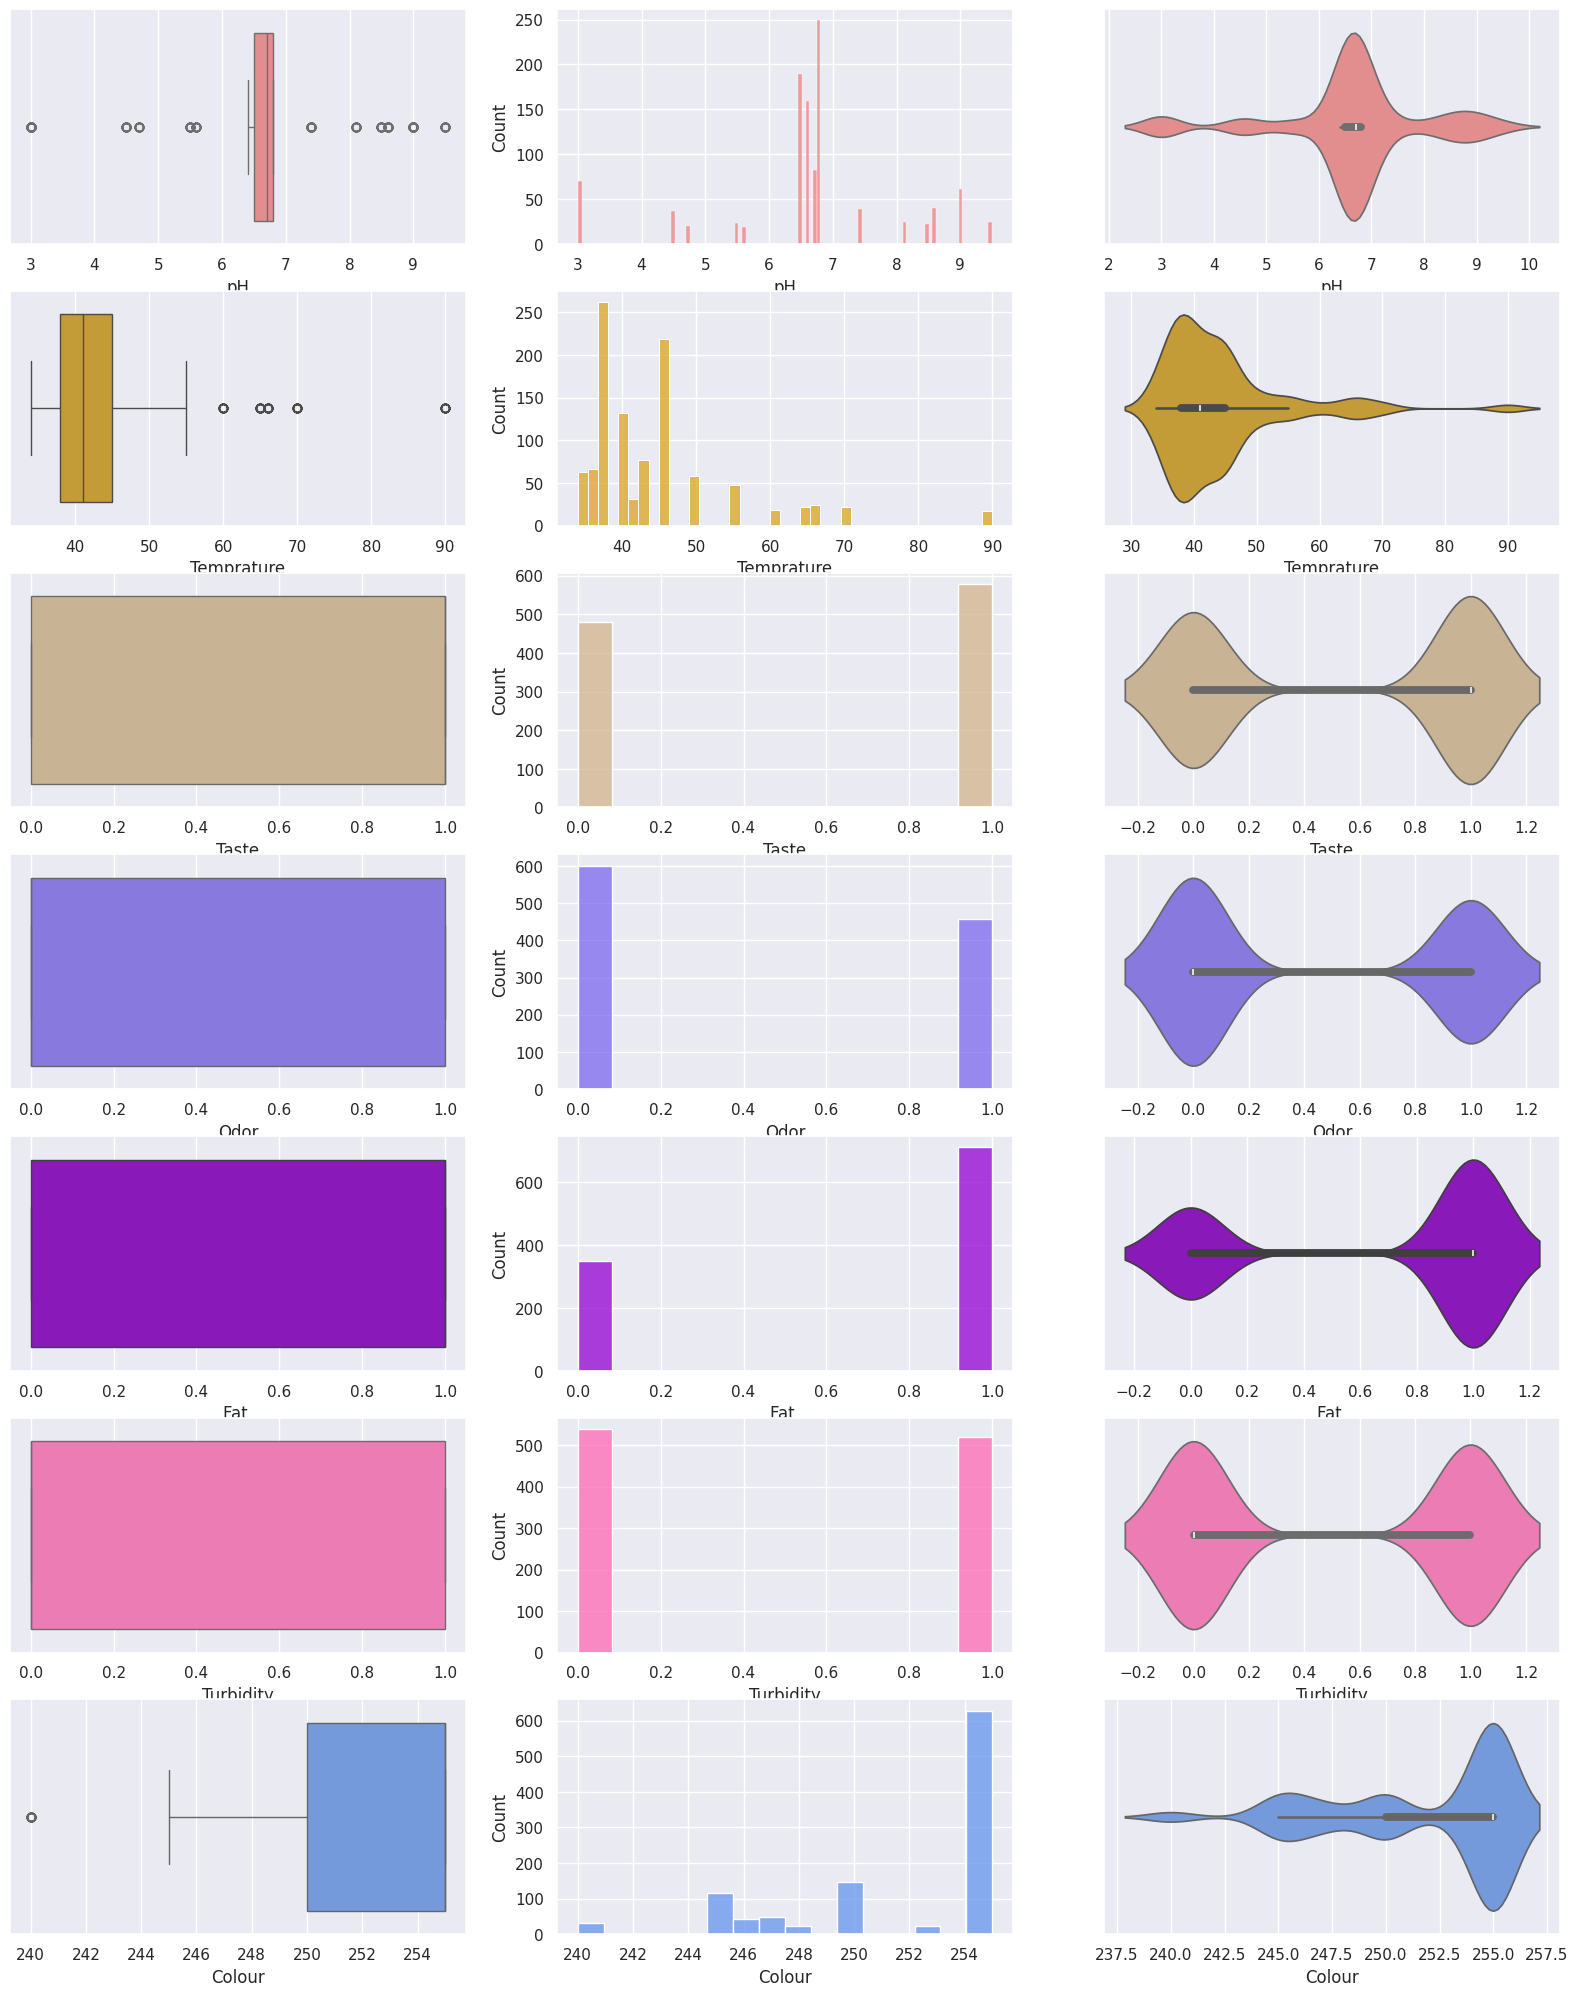

In [16]:
# Draw the distributions of all variables in boxplots, histograms, and violin plots.
f, axes = plt.subplots(7, 3, figsize=(20, 25))
colors = ["lightcoral", "goldenrod", "tan", "mediumslateblue", "darkviolet", "hotpink", "cornflowerblue", "dodgerblue", "royalblue", "mediumaquamarine", "teal", "firebrick"]

count = 0
for var in milkData2:
    sb.boxplot(data=milkData2[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=milkData2[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=milkData2[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

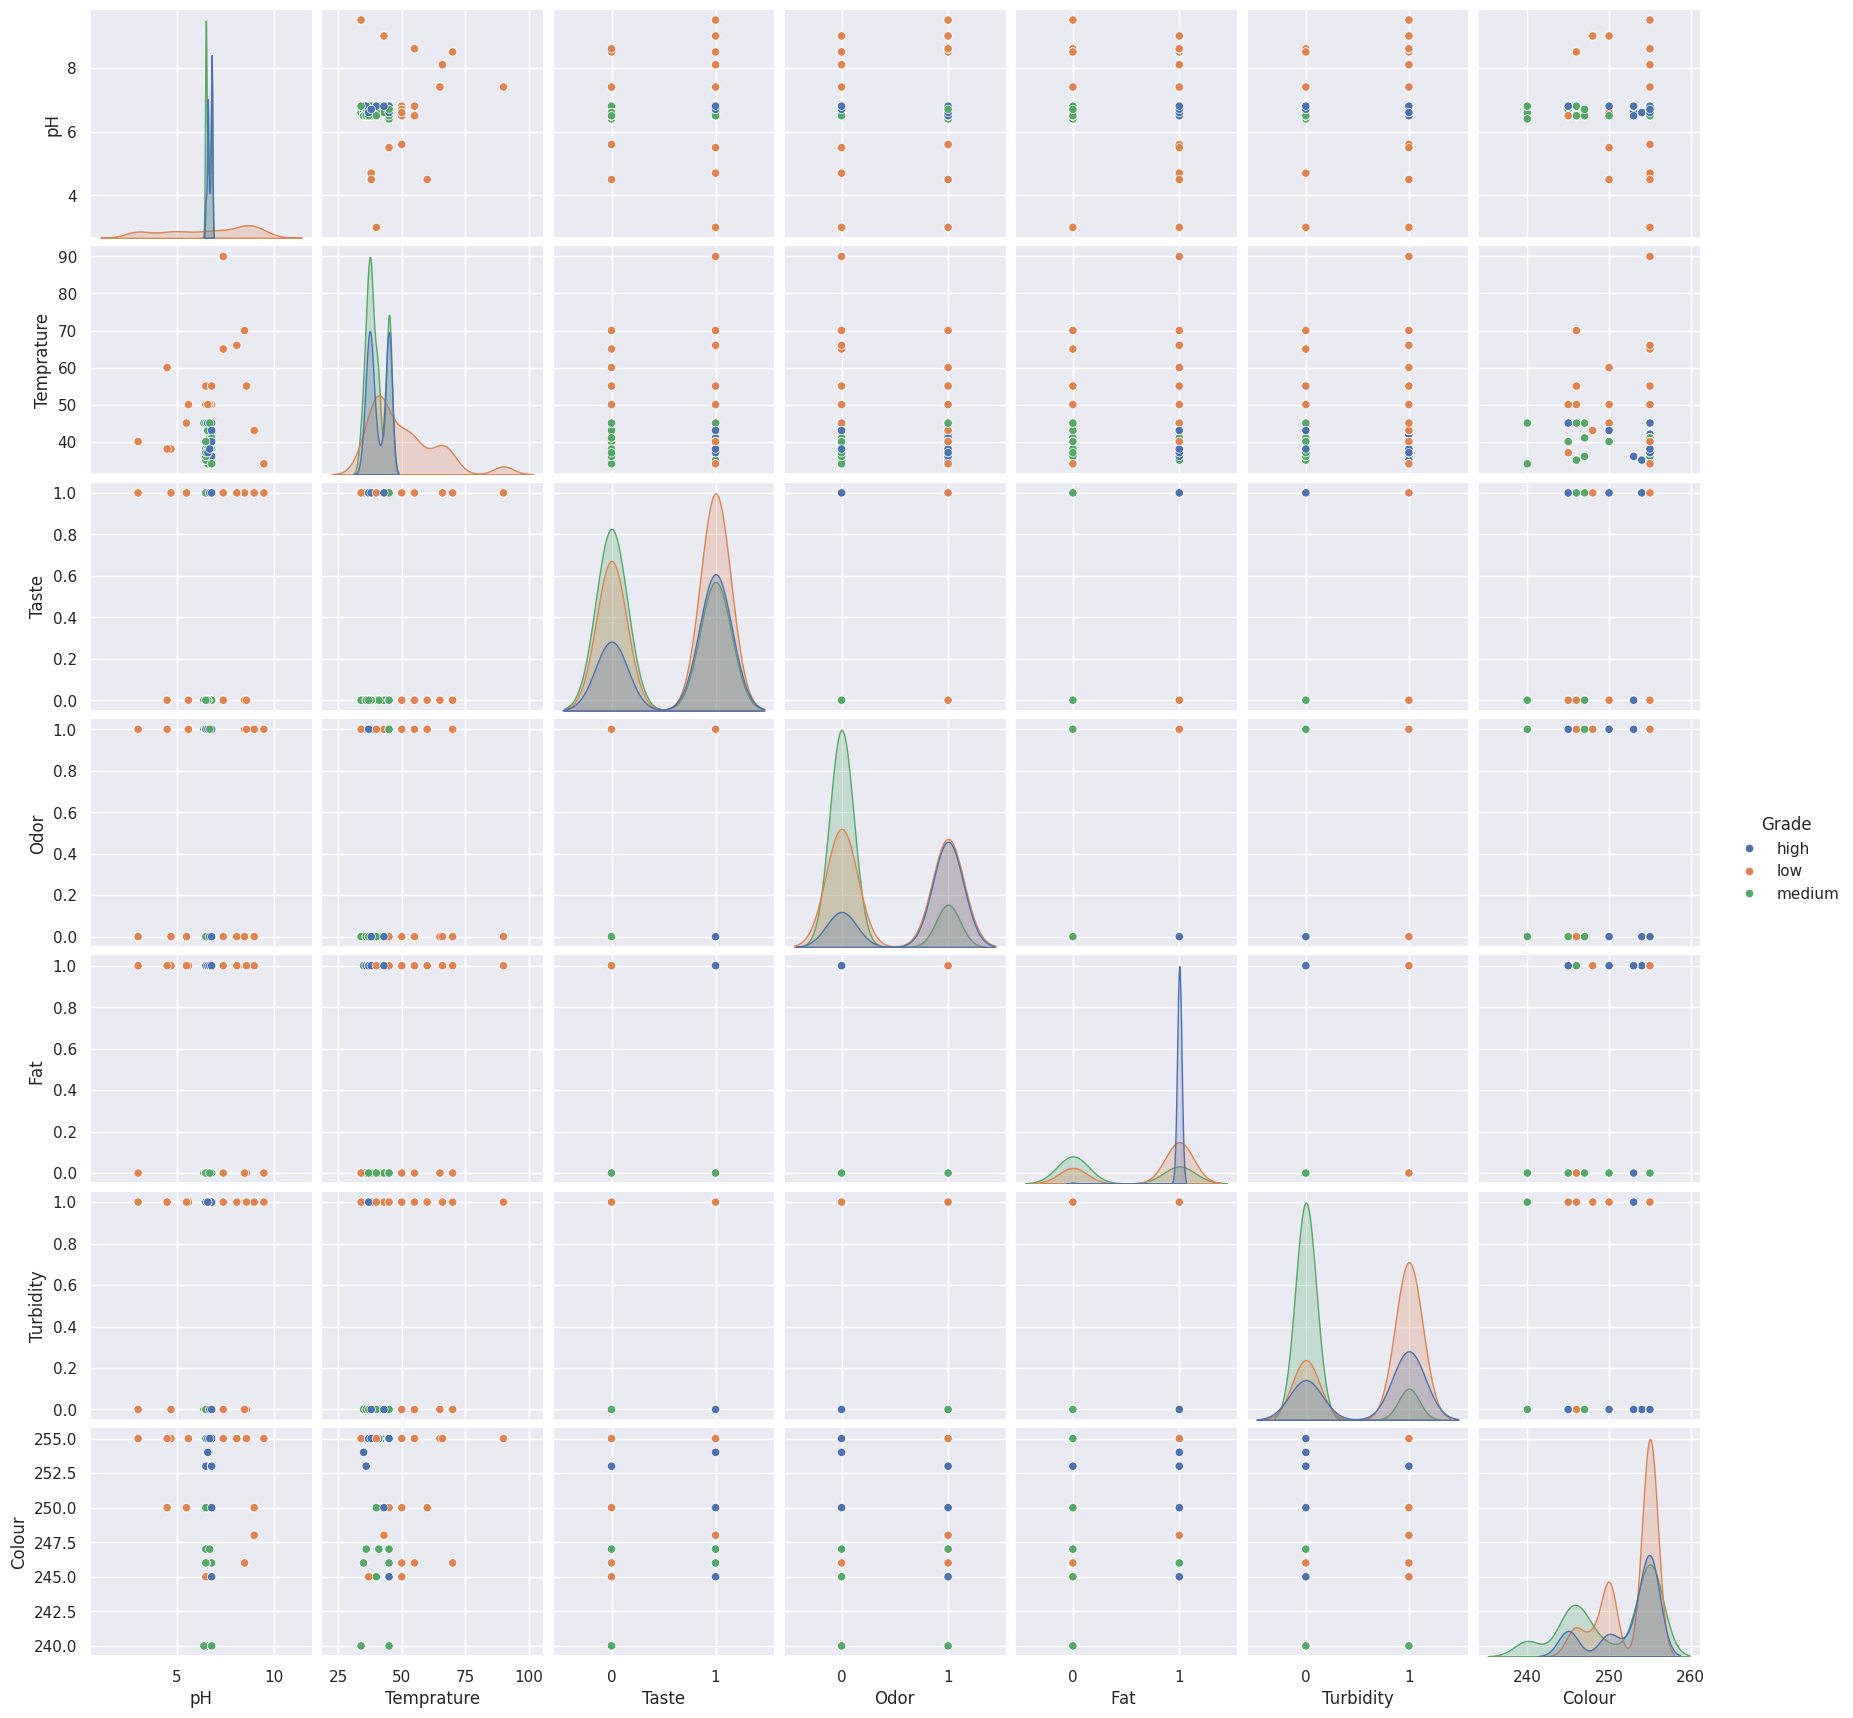

In [17]:
sb.pairplot(milkData,vars=milkData.columns[:-1],hue='Grade')

Density Plot

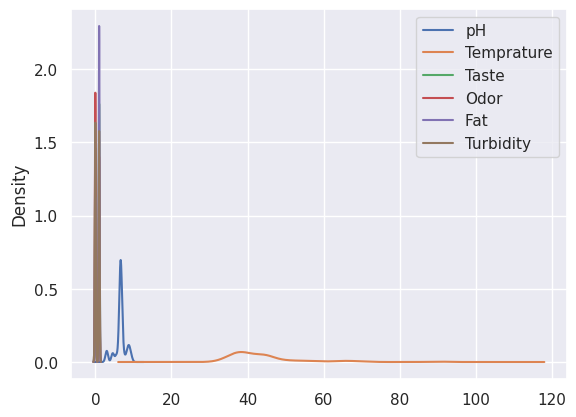

In [18]:
cols = milkData.columns[:6]
densityplot = milkData[cols].plot(kind='density')

In [19]:
print('The lowest temperature in the Milk is '+ str(milkData['Temprature'].min()))
print('The highest temperature in the Milk is '+ str(milkData['Temprature'].max()))
print('The average temperature in the Milk is '+ str(round(milkData['Temprature'].mean(),3)))
#min, max, average for PH
print('The lowest pH in the Milk is '+ str(milkData['pH'].min()))
print('The highest pH in the Milk is '+ str(milkData['pH'].max()))
print('The average pH in the Milk is '+ str(round(milkData['pH'].mean(),3)))
#min,max,averagr for colour
print('The lowest Colour in the Milk is '+ str(milkData['Colour'].min()))
print('The highest Colour in the Milk is '+ str(milkData['Colour'].max()))
print('The average Colour in the Milk is '+ str(round(milkData['Colour'].mean(),3)))

The lowest temperature in the Milk is 34
The highest temperature in the Milk is 90
The average temperature in the Milk is 44.227
The lowest pH in the Milk is 3.0
The highest pH in the Milk is 9.5
The average pH in the Milk is 6.63
The lowest Colour in the Milk is 240
The highest Colour in the Milk is 255
The average Colour in the Milk is 251.84


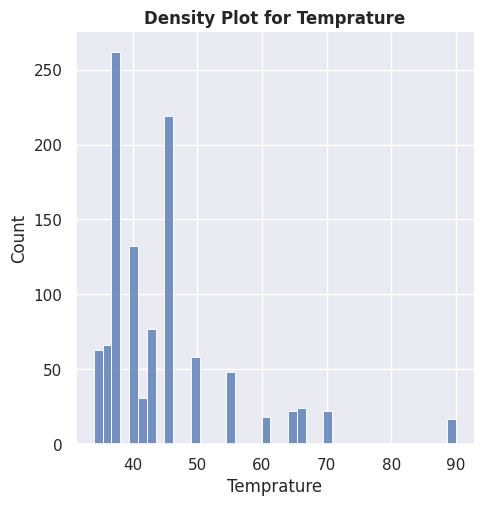

In [20]:
sb.displot(milkData['Temprature'], color = 'b')
plt.title("Density Plot for Temprature",fontname="Times New Roman", size=12 ,fontweight="bold" )
plt.show()

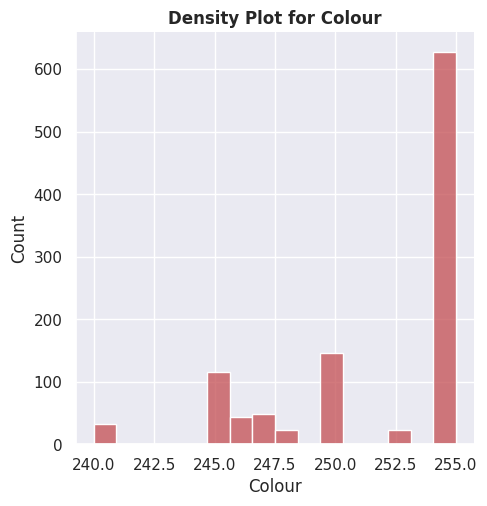

In [21]:
sb.displot(milkData['Colour'], color = 'r')
plt.title("Density Plot for Colour",fontname="Times New Roman", size=12 ,fontweight="bold" )
plt.show()

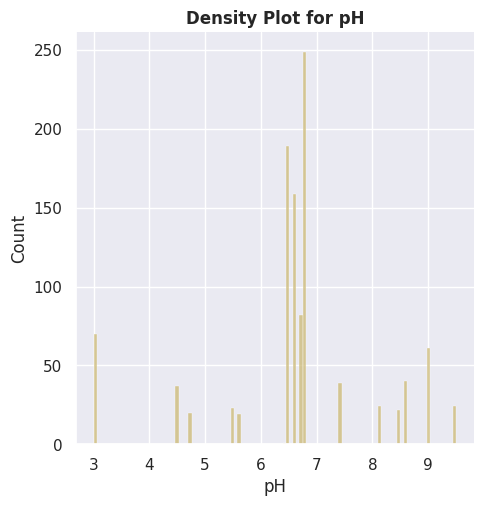

In [22]:
sb.displot(milkData['pH'], color = 'y')
plt.title("Density Plot for pH",fontname="Times New Roman", size=12 ,fontweight="bold" )
plt.show()

Extracting the Grade variable

In [23]:
milkData.Grade.value_counts()

,count
Grade,
low,429
medium,374
high,256


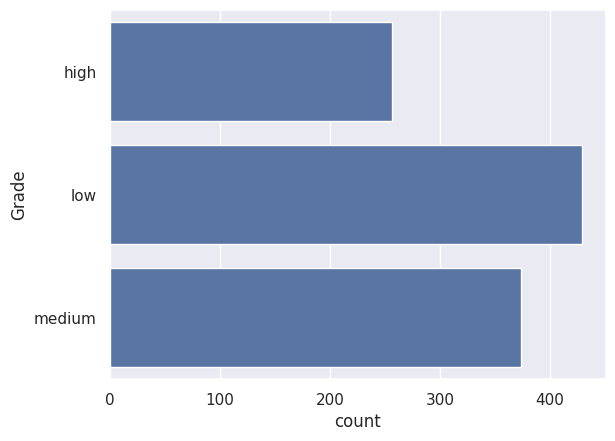

In [24]:
sb.countplot(milkData['Grade'])
plt.show()

Correlation Heat Map

                  pH  Temprature     Taste      Odor      Fat   Turbidity  \
pH          1.000000    0.244684 -0.064053 -0.081331 -0.093429   0.048384   
Temprature  0.244684    1.000000 -0.109792 -0.048870  0.024073   0.185106   
Taste      -0.064053   -0.109792  1.000000  0.017582  0.324149   0.055755   
Odor       -0.081331   -0.048870  0.017582  1.000000  0.314505   0.457935   
Fat        -0.093429    0.024073  0.324149  0.314505  1.000000   0.329264   
Turbidity   0.048384    0.185106  0.055755  0.457935  0.329264   1.000000   
Colour     -0.164565   -0.008511 -0.082654 -0.039361  0.114151   0.136436   

              Colour  
pH         -0.164565  
Temprature -0.008511  
Taste      -0.082654  
Odor       -0.039361  
Fat         0.114151  
Turbidity   0.136436  
Colour      1.000000  


<Axes: >

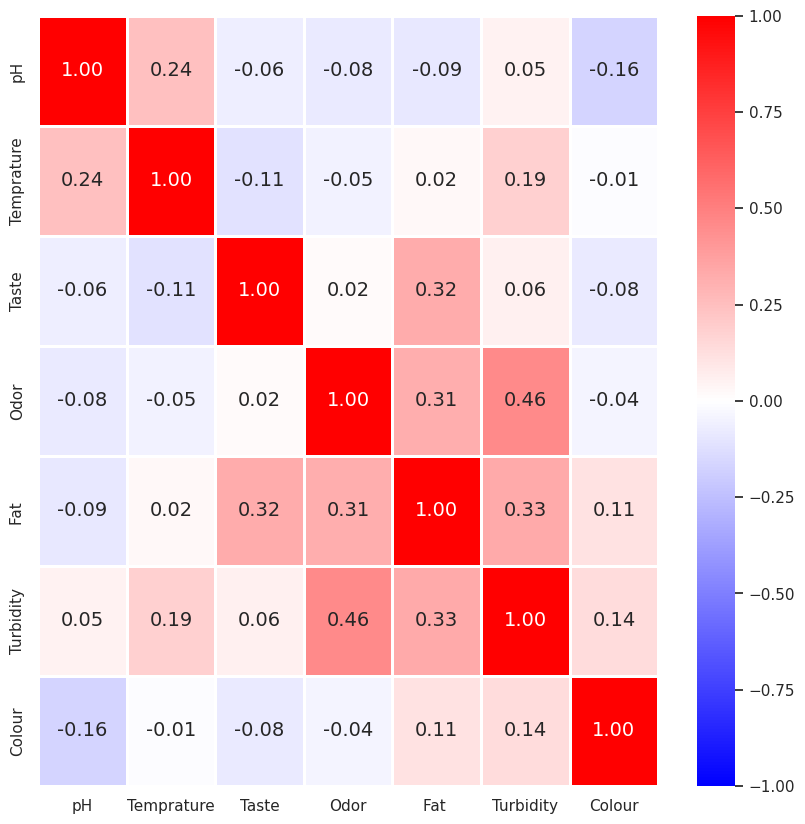

In [26]:
print(milkData.drop(columns=['Grade']).corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(milkData.drop(columns=['Grade']).corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "bwr")